<a href="https://colab.research.google.com/github/43pratik/WeIntern-internship/blob/main/Week-1_Basic-Neural-Network/code/WeIntern_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

(np.float64(-0.5), np.float64(7.5), np.float64(7.5), np.float64(-0.5))

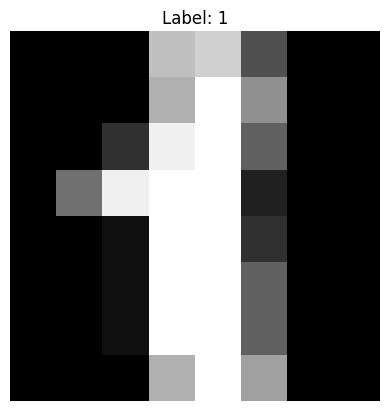

In [ ]:
plt.imshow(digits.images[1], cmap='gray')
plt.title("Label: " + str(y[1]))
plt.axis('off')


In [ ]:
X = X / 16.0
input_size = 64
hidden_size = 32
output_size = 10


In [ ]:
#here we initialize weights and bais
np.random.seed(42)

W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))



In [ ]:
#it where we define Activation Function
def relu(z):
    return np.maximum(0, z)
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [ ]:
#Forward Propogation
Z1 = np.dot(X, W1) + b1
A1 = relu(Z1)

Z2 = np.dot(A1, W2) + b2
A2 = softmax(Z2)
print(A2.shape)


(1797, 10)


In [ ]:
m = y.shape[0]

y_one_hot = np.zeros((m, output_size))
y_one_hot[np.arange(m), y] = 1


In [ ]:
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-9
    loss = -np.sum(y_true * np.log(y_pred + epsilon)) / y_true.shape[0]
    return loss
loss = cross_entropy_loss(y_one_hot, A2)
print("Initial Loss:", loss)

Initial Loss: 2.7786616864540528


In [ ]:
y_pred = np.argmax(A2, axis=1)
accuracy = np.mean(y_pred == y)
print("Initial Accuracy:", accuracy)


Initial Accuracy: 0.1001669449081803


In [ ]:
#here we train the model with 500 epoches and the learning rate is 0.01
learning_rate = 0.01
epochs = 500
losses = []

for epoch in range(epochs):

    #Forward Propagation
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    # Loss
    loss = cross_entropy_loss(y_one_hot, A2)
    losses.append(loss)

    #Backpropagation
    dZ2 = A2 - y_one_hot
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    #   Update Weights
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    #Print Loss
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 1.1603720164459428
Epoch 100, Loss: 1.010611312731866
Epoch 200, Loss: 0.8879539535358353
Epoch 300, Loss: 0.7885440882511378
Epoch 400, Loss: 0.7080028270036001


In [ ]:
y_pred_final = np.argmax(A2, axis=1)
final_accuracy = np.mean(y_pred_final == y)
print("Final Accuracy:", final_accuracy)


Final Accuracy: 0.9015025041736227


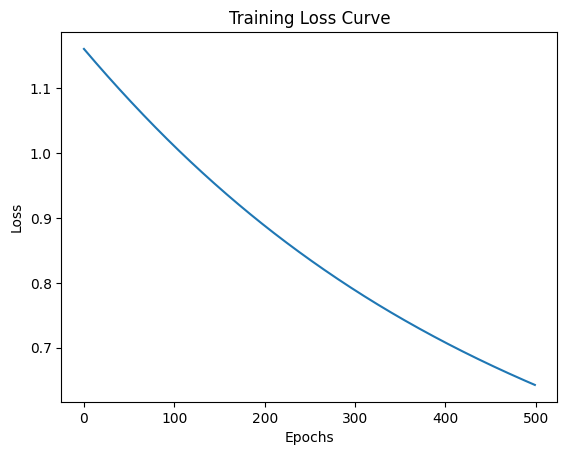

In [ ]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
